In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')
# tips datasetini aldık

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
def check_df(dataframe,head=5):
  print("##################### Shape #####################")
  print(dataframe.shape)
  print("##################### info #####################")
  print(dataframe.info)
  print("##################### Head #####################")
  print(dataframe.head(head))
  print("##################### Tail #####################")
  print(dataframe.tail(head))
  print("##################### NA #####################")
  print(dataframe.isnull().sum())

check_df(df)

# veriseti hakkında bilgi alabilmek için fonksiyon oluşturduk
# fonksiyon içerisinde verisetihakkında alacağımız bilgileri yazdık

##################### Shape #####################
(244, 7)
##################### info #####################
<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>
##################### Head #####################
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner 

# **Kategorik Değişken Analizi (Analysis of Categorical Variables)**

In [9]:
cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
cat_cols

# öncelikle kategorik değişkenleri yakalamak için cat_cols değişkeni oluşturduk

# list comprehension yapısı ile kategorik değişkenleri yakaladık

['sex', 'smoker', 'day', 'time']

In [10]:
num_but_cat = [col for col in df.columns if df[col].nunique()<10 and df[col].dtypes in ["int64","float64"]]
num_but_cat

# kategorik değişkenleri yakaladıktan sonra numerik görünen ama kategorik
# olan değişkenleri yakaladık

# bu değişkenlerin sayısı 10 dan küçükse kategorik olarak sayılırlar


['size']

In [11]:
cat_but_car=[col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category","object"]]
cat_but_car

# kategorik görünen ama kategorik olmayan değişkenleri yakaladık

# bu değişkenlerin sayısı 20 den büyük olduğu için kategorik olarak
# değerlendilirmezler

[]

In [12]:
cat_cols=[col for col in cat_cols if  col not in cat_but_car]
df[cat_cols]

# kategorik olarak görülen ama sayısı 20 yi aşan değişkenleri almadık

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [13]:
df[cat_cols].nunique()

# kategorik değişkenlerin benzersiz sayılarını gördük

,0
sex,2
smoker,2
day,4
time,2


# **FONKSİYONLAŞTIRMA**

        sex      Ratio
sex                   
Male    157  64.344262
Female   87  35.655738
#################################################################
        smoker      Ratio
smoker                   
No         151  61.885246
Yes         93  38.114754
#################################################################
      day      Ratio
day                 
Sat    87  35.655738
Sun    76  31.147541
Thur   62  25.409836
Fri    19   7.786885
#################################################################
        time      Ratio
time                   
Dinner   176  72.131148
Lunch     68  27.868852
#################################################################
        sex      Ratio
sex                   
Male    157  64.344262
Female   87  35.655738
#################################################################


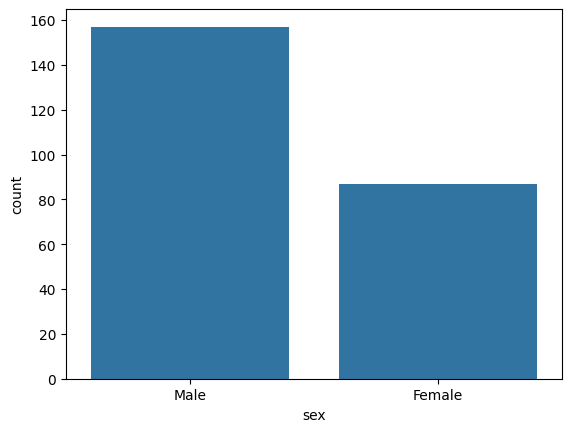

        smoker      Ratio
smoker                   
No         151  61.885246
Yes         93  38.114754
#################################################################


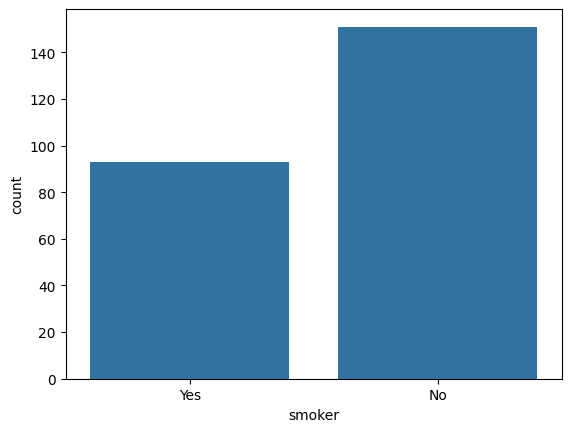

      day      Ratio
day                 
Sat    87  35.655738
Sun    76  31.147541
Thur   62  25.409836
Fri    19   7.786885
#################################################################


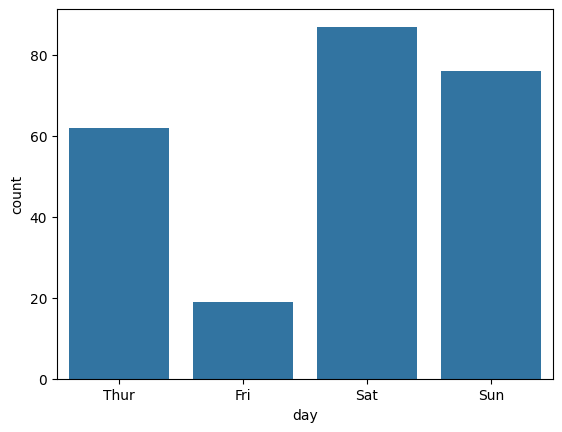

        time      Ratio
time                   
Dinner   176  72.131148
Lunch     68  27.868852
#################################################################


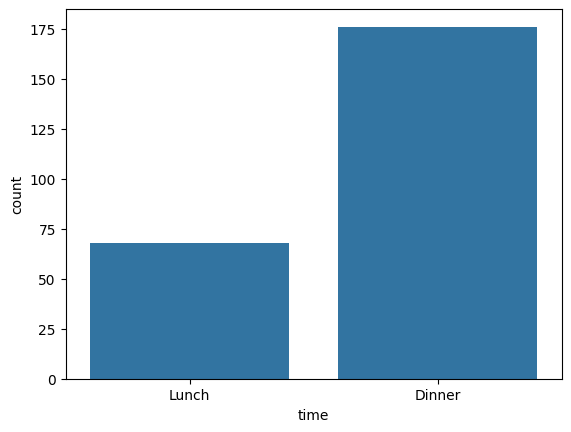

        sex      Ratio
sex                   
Male    157  64.344262
Female   87  35.655738
#################################################################


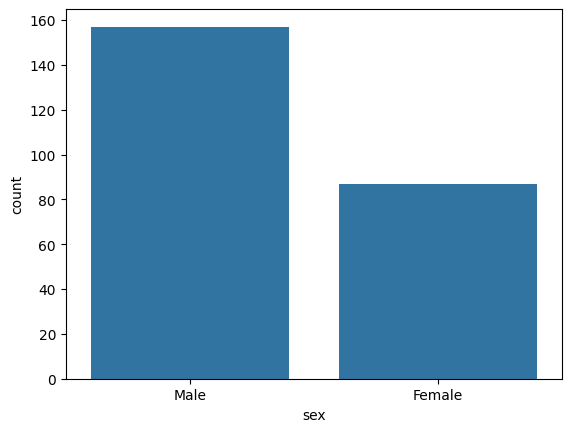

        smoker      Ratio
smoker                   
No         151  61.885246
Yes         93  38.114754
#################################################################


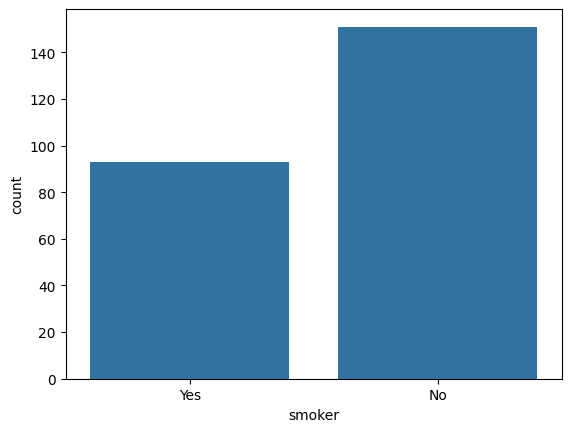

      day      Ratio
day                 
Sat    87  35.655738
Sun    76  31.147541
Thur   62  25.409836
Fri    19   7.786885
#################################################################


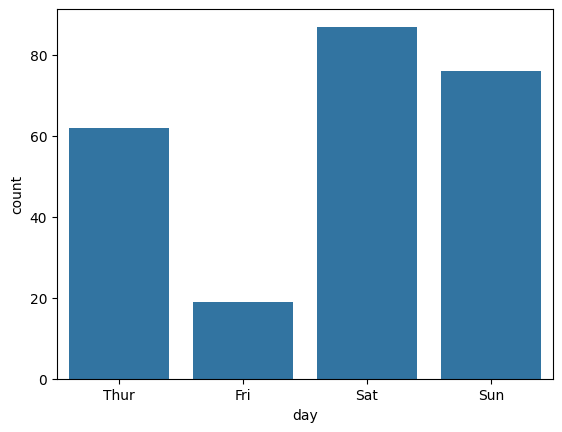

        time      Ratio
time                   
Dinner   176  72.131148
Lunch     68  27.868852
#################################################################


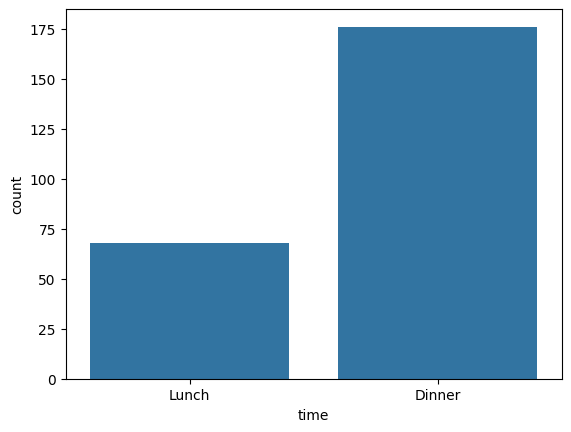

In [14]:
def cat_summary(dataframe,col_name):
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      'Ratio':100*dataframe[col_name].value_counts()/len(dataframe)}))
  print('#################################################################')

# burada cat_summary adında fonksiyon a dataframe ve col_name parametleri verdik
# ve fonksiyon içinde dataframe oluşturup col adlarını ve özelliklerini aldık

# aynı zamanda ratio ile değişkenin verisetindeki yüzdesini görebiliriz


for col in cat_cols:
  cat_summary(df,col)

# for döngüsü kullanarak oluşturduğumuz cat_cols içerisinde gezindik
# ve tek tek işlem yaptık

def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      'Ratio':100*dataframe[col_name].value_counts()/len(dataframe)}))
  print('#################################################################')

# burada bir fark ile kategorik değişkenlerimizi görselleştirdik

# grafik kullabilmek için plot parametresi ekledik

  if plot:
    sns.countplot(data=dataframe,x=dataframe[col_name])
    plt.show(block=True)

# grafikleştirebilmek için seaborn ve matplotlib kullandık


for col in cat_cols:
  cat_summary(df,col,plot=True)

# for döngüsü ile cat_cols içerisinde gezindik

# kategorik değişkenlerimizi görselleştirdik

for col in cat_cols:
    if df[col].dtypes =="bool":
        df[col] = df[col].astype(int)
        cat_summary(df,col,plot=True)
    else:
        cat_summary(df,col,plot=True)

# burada ise cat_cols içerisinde gezin ve tipi bool ise int e çevir dedik

# **Sayısal Değişken Analizi (Analysis of Numerical Variables)**

In [15]:
num_cols=[col for col in df.columns if df[col].dtypes in ["int64","float64"]]

# numerik değişkenleri yakalayabilmek için col üzerinde gezinip içerisinde
# int64 ve float64 olan değişkenleri yakalan bir list comprehension  yapısı
# oluşturduK

num_cols=[col for col in num_cols if col not in cat_cols]

# burada ise numerik kolonlarda gezin ve kategorik değişkenlerin için de yoksa
# seç demek istedik

num_cols

['total_bill', 'tip', 'size']

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
df[['total_bill','tip']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00


# **FONKSİYONLAŞTIRMA**

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
5%         1.440000
10%        1.500000
20%        2.000000
30%        2.000000
40%        2.476000
50%        2.900000
60%        3.016000
70%        3.480000
80%        4.000000
90%        5.000000
95%        5.195500
99%        7.214500
max       10.000000
Name: tip, dtype: float64
################################################
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
5%         9.557500
10%       10.340000
20%       12.636000
30%       14.249000
40%       16.222000
50%       17.795000
60%       19.818000
70%       22.508000
80%       26.098000
90%       32.235000
95%       38.061000
99%       48.227000
max       50.810000
Name: total_bill, dtype: float64
################################################
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
5%         1.440000
10%        1.500000
20%        2.000000
30%        2.000000
40%

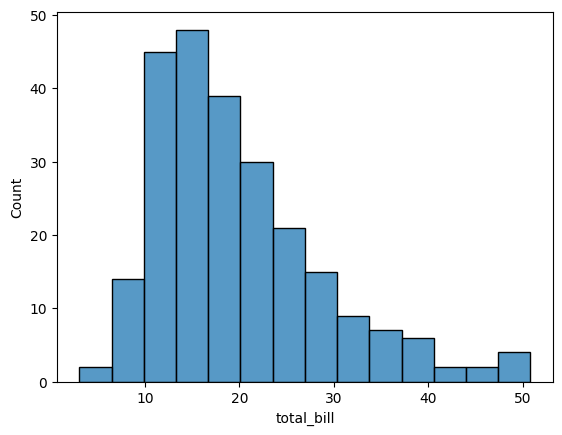

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
5%         1.440000
10%        1.500000
20%        2.000000
30%        2.000000
40%        2.476000
50%        2.900000
60%        3.016000
70%        3.480000
80%        4.000000
90%        5.000000
95%        5.195500
99%        7.214500
max       10.000000
Name: tip, dtype: float64
################################################


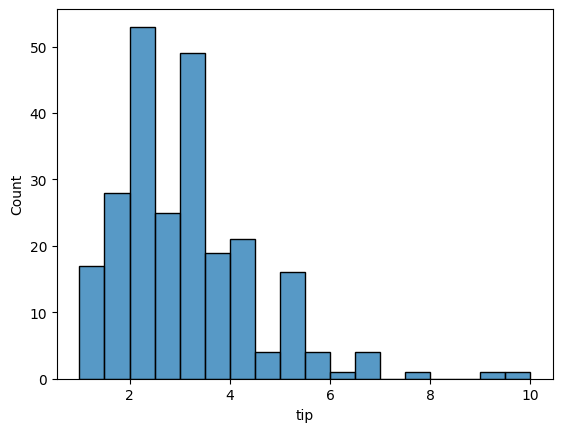

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
5%         2.000000
10%        2.000000
20%        2.000000
30%        2.000000
40%        2.000000
50%        2.000000
60%        2.000000
70%        3.000000
80%        3.000000
90%        4.000000
95%        4.000000
99%        6.000000
max        6.000000
Name: size, dtype: float64
################################################


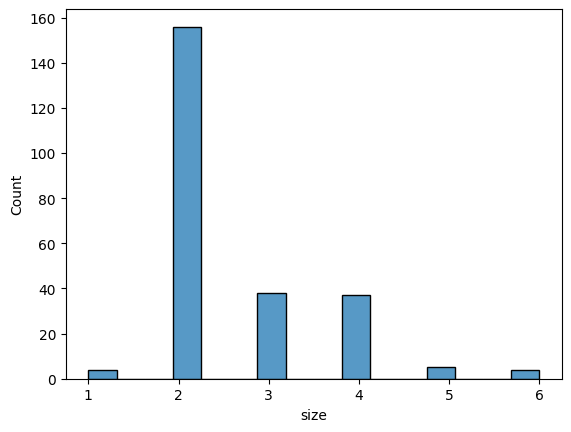

In [17]:
def num_summary(dataframe,numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print("################################################")


num_summary(df,"tip")

for col in num_cols:
    num_summary(df,col)

def num_summary(dataframe,numerical_col,plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print("################################################")

    if plot:
      sns.histplot(data=dataframe, x=numerical_col)
      plt.show(block=True)

for col in num_cols:
  num_summary(df,col,plot=True)

# **Hedef Değişkenin Kategorik Değişkenler ile Analizi**

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
def target_summary_with_cat(dataframe,target,categorical_col):
  print(pd.DataFrame({'TARGET_MEAN':dataframe.groupby(categorical_col,observed=True)[target].mean()}), end="\n\n\n")

for col in cat_cols:
  target_summary_with_cat(df,'tip',col)

        TARGET_MEAN
sex                
Male       3.089618
Female     2.833448


        TARGET_MEAN
smoker             
Yes        3.008710
No         2.991854


      TARGET_MEAN
day              
Thur     2.771452
Fri      2.734737
Sat      2.993103
Sun      3.255132


        TARGET_MEAN
time               
Lunch      2.728088
Dinner     3.102670




In [27]:
def target_summary_with_num(dataframe,target,numerical_col):
  print(dataframe.groupby(target).agg({numerical_col:'mean'}), end="\n\n\n")

for col in num_cols:
  target_summary_with_num(df,'tip',col)

       total_bill
tip              
1.00     7.167500
1.01    16.990000
1.10    12.900000
1.17    32.830000
1.25     9.696667
...           ...
6.70    34.300000
6.73    48.270000
7.58    39.420000
9.00    48.330000
10.00   50.810000

[123 rows x 1 columns]


         tip
tip         
1.00    1.00
1.01    1.01
1.10    1.10
1.17    1.17
1.25    1.25
...      ...
6.70    6.70
6.73    6.73
7.58    7.58
9.00    9.00
10.00  10.00

[123 rows x 1 columns]


       size
tip        
1.00    1.5
1.01    2.0
1.10    2.0
1.17    2.0
1.25    2.0
...     ...
6.70    6.0
6.73    4.0
7.58    4.0
9.00    4.0
10.00   3.0

[123 rows x 1 columns]


